In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
from astropy.time import Time
from astropy.io import fits
from astropy.stats import sigma_clip

In [4]:
ls /grp/hst/wfc3e/jmedina/uf_pl/2017-12-26_2018-01-25/uf_superdark

2018-01-02_superdark.fits  nnidp015ltq_blv_tmp.fits
2018-01-14_superdark.fits  nnidp016l4q_blv_tmp.fits
nnidp011kfq_blv_tmp.fits   nnidp017l7q_blv_tmp.fits
nnidp012kwq_blv_tmp.fits   nnidp018l9q_blv_tmp.fits
nnidp013l7q_blv_tmp.fits   nnidp019llq_blv_tmp.fits
nnidp014liq_blv_tmp.fits   nnidp020lnq_blv_tmp.fits


In [5]:
from glob import glob
mains = glob('/grp/hst/wfc3e/jmedina/uf_pl/20*')

In [5]:
superdarks_list = []
for main in mains:
    superdarks = glob(os.path.join(main,'uf_superdark','*superdark*'))
    superdarks_list.extend(superdarks)

In [6]:
superdarks_list

['/grp/hst/wfc3e/jmedina/uf_pl/2015-11-04_2015-12-02/uf_superdark/2015-11-09_superdark.fits',
 '/grp/hst/wfc3e/jmedina/uf_pl/2015-11-04_2015-12-02/uf_superdark/2015-11-23_superdark.fits',
 '/grp/hst/wfc3e/jmedina/uf_pl/2016-04-19_2016-05-21/uf_superdark/2016-05-08_superdark.fits',
 '/grp/hst/wfc3e/jmedina/uf_pl/2016-04-19_2016-05-21/uf_superdark/2016-04-25_superdark.fits',
 '/grp/hst/wfc3e/jmedina/uf_pl/2015-04-22_2015-05-20/uf_superdark/2015-04-27_superdark.fits',
 '/grp/hst/wfc3e/jmedina/uf_pl/2015-04-22_2015-05-20/uf_superdark/2015-05-10_superdark.fits',
 '/grp/hst/wfc3e/jmedina/uf_pl/2016-08-12_2016-09-07/uf_superdark/2016-08-15_superdark.fits',
 '/grp/hst/wfc3e/jmedina/uf_pl/2016-08-12_2016-09-07/uf_superdark/2016-08-28_superdark.fits',
 '/grp/hst/wfc3e/jmedina/uf_pl/2013-09-12_2013-10-10/uf_superdark/2013-09-17_superdark.fits',
 '/grp/hst/wfc3e/jmedina/uf_pl/2013-09-12_2013-10-10/uf_superdark/2013-09-30_superdark.fits',
 '/grp/hst/wfc3e/jmedina/uf_pl/2013-10-10_2013-11-10/uf_supe

In [37]:
num_hotpix_closest_C = []
num_hotpix_furthest_C = []

med_hotpix_closest_C = []
med_hotpix_furthest_C = []


num_hotpix_closest_D = []
num_hotpix_furthest_D = []

med_hotpix_closest_D = []
med_hotpix_furthest_D = []


anneal_cycles = []

for i in superdarks_list:
    # anneal cycles (X-AXIS)
    anneal_cycle = i.split('/')[-1].split('_')[0]
    t = Time(anneal_cycle,format='iso')
    decimal_year = t.decimalyear
    anneal_cycles.append(decimal_year)
    
    
    # AMP C
    sci1_closest_c = fits.getdata(i,1)[0:100,0:100]
    dq3_closest_c  = fits.getdata(i,3)[0:100,0:100]
    
    sci1_furthest_c = fits.getdata(i,1)[1900:2000,1900:2000]
    dq3_furthest_c  = fits.getdata(i,3)[1900:2000,1900:2000]
    
    num_hotpix_closest_C.append(len(sci1_closest_c[dq3_closest_c == 16.]))
    num_hotpix_furthest_C.append(len(sci1_furthest_c[dq3_furthest_c == 16.]))
    
    med_hotpix_closest_C.append(np.median(sci1_closest_c[dq3_closest_c == 16.]))
    med_hotpix_furthest_C.append(np.median(sci1_furthest_c[dq3_furthest_c == 16.]))
    
    
    # AMP D
    sci1_closest_d = fits.getdata(i,1)[0:100,3900:4000]
    dq3_closest_d = fits.getdata(i,3)[0:100,3900:4000]
    
    sci1_furthest_d = fits.getdata(i,1)[1900:2000,2050:2150]
    dq3_furthest_d = fits.getdata(i,3)[1900:2000,2050:2150]
    
    num_hotpix_closest_D.append(len(sci1_closest_d[dq3_closest_d == 16.]))
    num_hotpix_furthest_D.append(len(sci1_furthest_d[dq3_furthest_d == 16.]))
    
    med_hotpix_closest_D.append(np.median(sci1_closest_d[dq3_closest_d == 16.]))
    med_hotpix_furthest_D.append(np.median(sci1_furthest_d[dq3_furthest_d == 16.]))

/Users/jmedina/miniconda3/envs/astroconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jmedina/miniconda3/envs/astroconda/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [30]:
t = Time('2017-07-30',format='iso')
t.decimalyear

2017.5753424657535

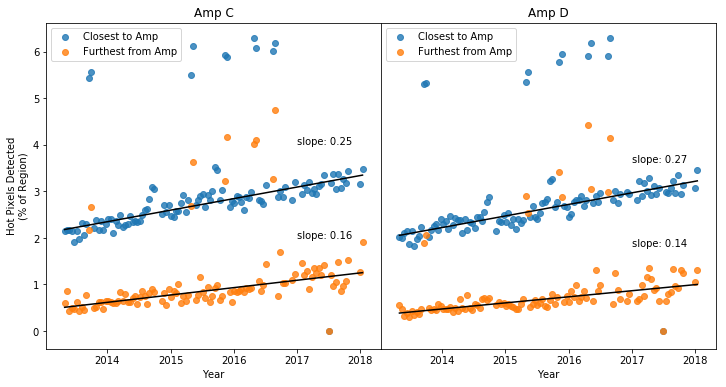

In [111]:
# NUMBER OF HOT PIXELS Comparison
%matplotlib inline

area_of_quad = 100*100

y_pop1_C = [(data_point/area_of_quad)*100 for data_point in num_hotpix_closest_C]
y_pop2_C = [(data_point/area_of_quad)*100 for data_point in num_hotpix_furthest_C]
x_C = anneal_cycles

y_pop1_D = [(data_point/area_of_quad)*100 for data_point in num_hotpix_closest_D]
y_pop2_D = [(data_point/area_of_quad)*100 for data_point in num_hotpix_furthest_D]
x_D = anneal_cycles

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Labelling
axs[0].set_title('Amp C')
axs[0].set_ylabel('Hot Pixels Detected'+'\n'+'(% of Region)')
axs[0].set_xlabel('Year')
# Plotting
axs[0].scatter(x_C, y_pop1_C,alpha=0.8, label='Closest to Amp')
axs[0].scatter(x_C, y_pop2_C,alpha=0.8, label='Furthest from Amp')
# Line fit
y_ma1_C = sigma_clip(y_pop1_C,sigma=3.0)
y_ma2_C = sigma_clip(y_pop2_C,sigma=3.0)

p1_C = np.poly1d(np.ma.polyfit(x_C,y_ma1_C,1))
p2_C = np.poly1d(np.ma.polyfit(x_C,y_ma2_C,1))

axs[0].plot(x_C, p1_C(x_C), color='black')
axs[0].annotate('slope: '+str(np.round(p1_C[1],2)), xy=(2017,4), xytext=(2017, 4))

axs[0].plot(x_C, p2_C(x_C), color='black')
axs[0].annotate('slope: '+str(np.round(p2_C[1],2)), xy=(2017,2), xytext=(2017, 2))
#axs[0].annotate('local max', xy=(2, 1), xytext=(3, 1.5),
 #           arrowprops=dict(facecolor='black', shrink=0.05),
 #           )
# Legend
axs[0].legend()

# Labelling
axs[1].set_title('Amp D')
axs[1].set_xlabel('Year')
# Plotting
axs[1].scatter(x_D, y_pop1_D, alpha=0.8, label='Closest to Amp')
axs[1].scatter(x_D, y_pop2_D, alpha=0.8, label='Furthest from Amp')
# Line fit
y_ma1_D = sigma_clip(y_pop1_D,sigma=3.0)
y_ma2_D = sigma_clip(y_pop2_D,sigma=3.0)

p1_D = np.poly1d(np.ma.polyfit(x_D,y_ma1_D,1))
p2_D = np.poly1d(np.ma.polyfit(x_D,y_ma2_D,1))

axs[1].plot(x_D, p1_D(x_D), color='black')
axs[1].annotate('slope: '+str(np.round(p1_D[1],2)), xy=(2017,4), xytext=(2017, 4))

axs[1].plot(x_D, p2_D(x_D), color='black')
axs[1].annotate('slope: '+str(np.round(p2_D[1],2)), xy=(2017,2), xytext=(2017, 2))
# Legend
axs[1].legend()
axs[1].set_yticks([])

#plt.text(0.5,1.0,'Region Comparison in Unflashed Superdarks'+'\n'+'Anneal Cycles: 04/26/2013 - 01/25/2018')
plt.subplots_adjust(wspace=0)

#plt.savefig('unflashed_superdark_region_comparison.pdf',dpi=144)

In [1]:
# MEDIAN VALUE OF HOT PIXELS Comparison

In [7]:
from glob import glob
import os
uf_sd_list = []
pf_sd_list = []

for main in mains:
    superdark_dirs = glob(os.path.join(main,'masterdark','*ufpf*'))
    for superdark_dir in superdark_dirs:
        uf_superdarks = glob(os.path.join(superdark_dir,'*superdark*'))
        pf_superdarks = glob(os.path.join(superdark_dir,'*drk*'))
        if (len(uf_superdarks) != 0) & (len(pf_superdarks) != 0):
            uf_sd_list.extend(uf_superdarks)
            pf_sd_list.extend(pf_superdarks)

In [8]:
uf_sd_list[0]

'/grp/hst/wfc3e/jmedina/uf_pl/2015-11-04_2015-12-02/masterdark/2015-11-23_ufpf_superdarks/2015-11-23_superdark.fits'

In [194]:
np.shape(fits.getdata(uf_sd_list[0],1)[1400:2000,:])

(600, 4096)

In [11]:
# MEDIAN HOT PIXEL VAL vs. # OF HOT PIXELS DETECTED
% matplotlib qt
uf_med = [] # median hp val in uf
pf_med = [] # median hp val in pf

uf_num = [] # hp detected in uf
pf_num = [] # hp detected in pf

#med_tot = []
#num_tot = []

for uf, pf in zip(uf_sd_list, pf_sd_list):
    # unflashed variables
    uf_sci1 = fits.getdata(uf,1)[1400:2000,:]
    uf_dq3  = fits.getdata(uf,3)[1400:2000,:]
    uf_hp   = uf_sci1[uf_dq3 == 16.]
    
    uf_med.append(np.median(uf_hp))
    uf_num.append(len(uf_hp))
    
    # postflashed variables
    pf_sci1 = fits.getdata(pf,1)[1400:2000,:]
    pf_dq3  = fits.getdata(pf,3)[1400:2000,:]
    pf_hp   = pf_sci1[uf_dq3 == 16.]
    
    pf_med.append(np.median(pf_hp))
    pf_num.append(len(pf_hp))

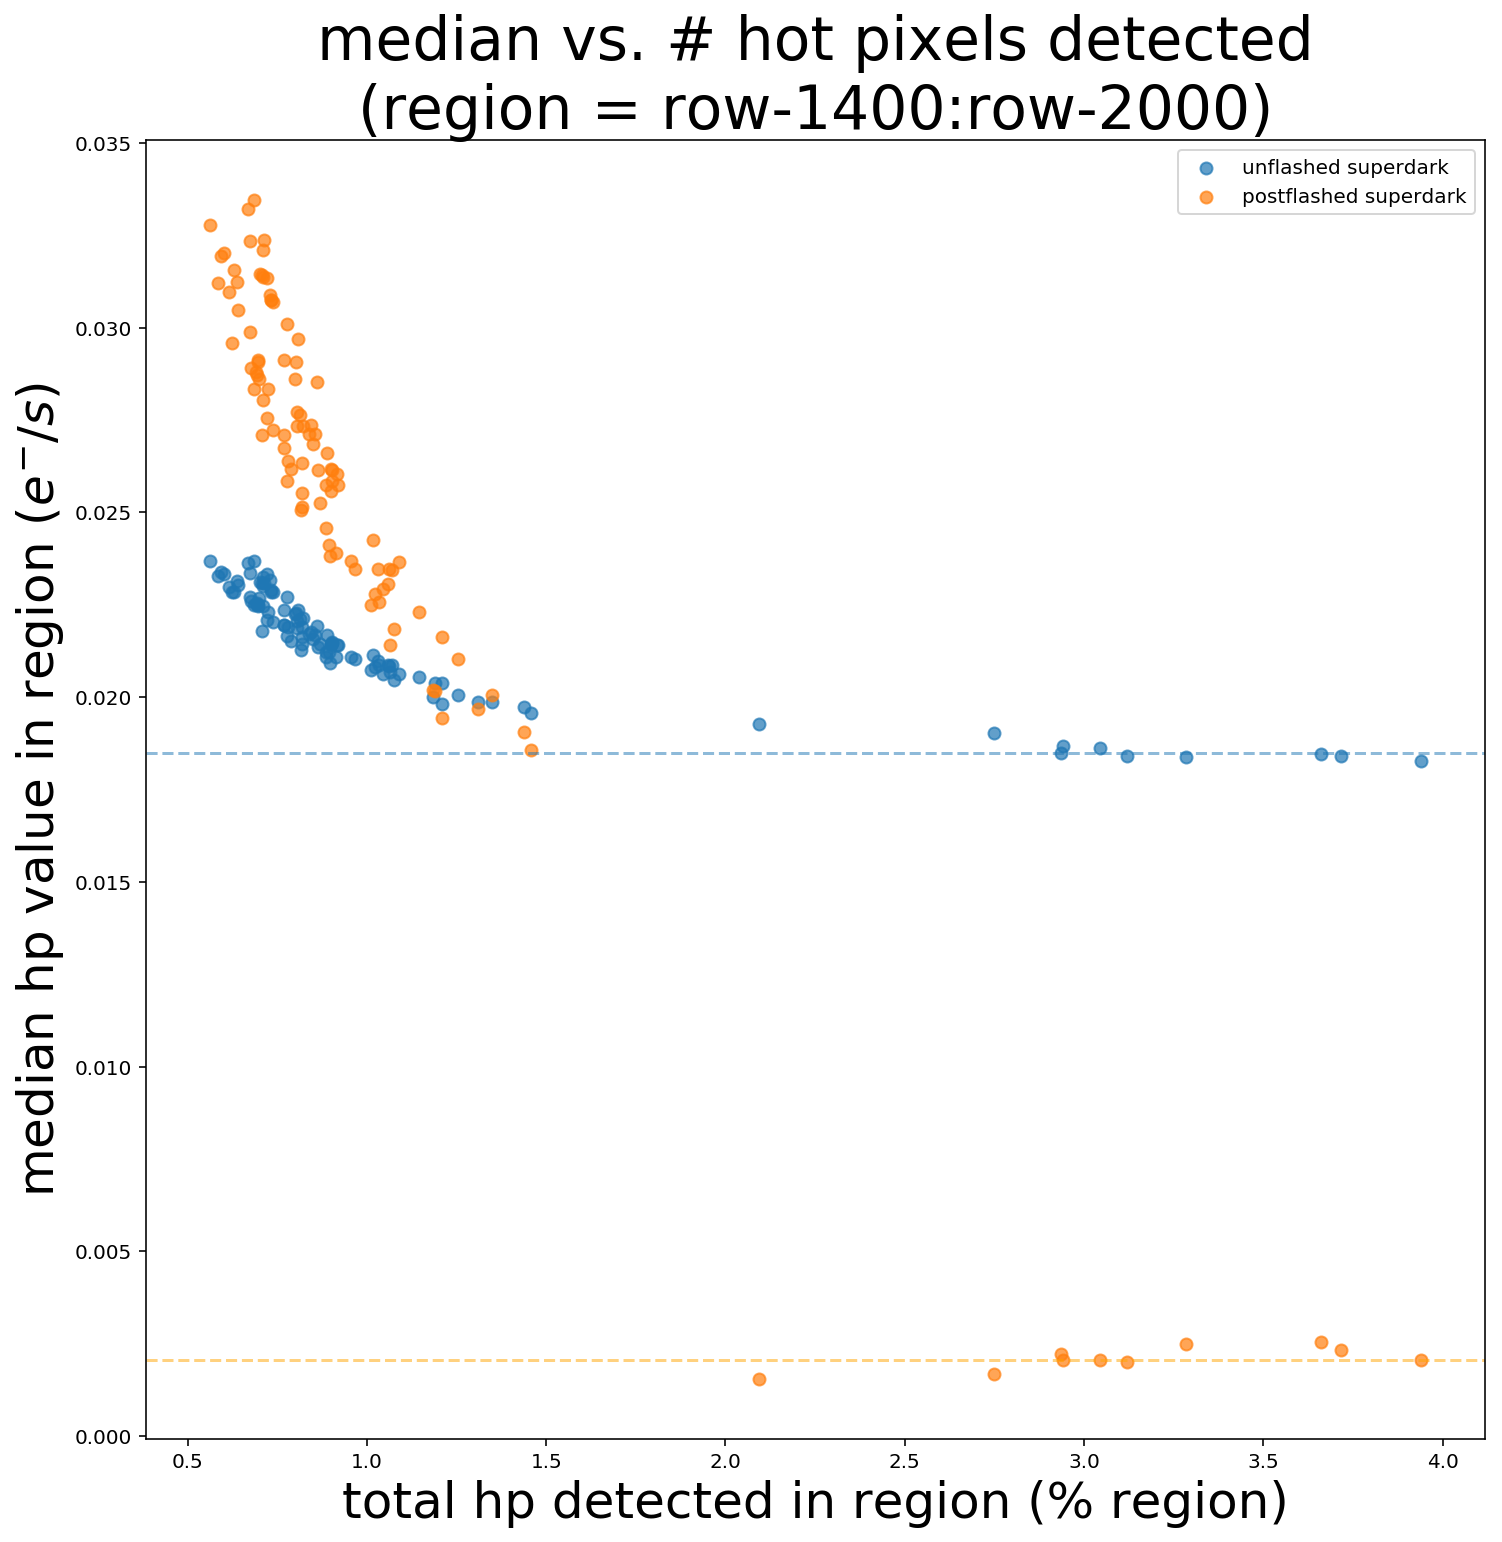

In [12]:
# conversion to %
uf_x = []
pf_x = []
a_region = 600*4096
for uf,pf in zip(uf_num, pf_num):
    uf_x.append((uf/a_region)*100)
    pf_x.append((pf/a_region)*100)
    
uf_y = uf_med
pf_y = pf_med

plt.figure(figsize=(12,12))
plt.scatter(uf_x, uf_y, alpha=0.7, label='unflashed superdark')
plt.scatter(pf_x, pf_y, alpha=0.7, label='postflashed superdark')

uf_x = np.asarray(uf_x)
uf_y = np.asarray(uf_y)
pf_x = np.asarray(pf_x)
pf_y = np.asarray(pf_y)
plt.axhline(np.median(uf_y[uf_x > 2.0]), alpha=0.5,linestyle='--')
plt.axhline(np.median(pf_y[pf_x > 1.8]), color='orange',alpha=0.5,linestyle='--')

plt.title('median vs. # hot pixels detected'+'\n' 
          '(region = row-1400:row-2000)', fontsize=30)
plt.xlabel('total hp detected in region (% region)', fontsize=25)
plt.ylabel(r'median hp value in region ($e^{-}/s$)', fontsize=25)
plt.legend()

plt.savefig('fixed_med_vs_num_2.pdf',dpi=144)

(array([ 10,  11,  14,  15,  16,  17,  18,  19,  20,  21,  22,  24,  25,
         28,  29,  30,  31,  34,  35,  38,  39,  40,  41,  42,  43,  48,
         49,  50,  51,  52,  53,  54,  55,  56,  57,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  73,  74,  75,  76,  77,
         80,  81,  82,  84,  85,  86,  88,  89,  90,  91,  92,  93,  94,
         96,  97,  98, 100, 101, 102, 103, 104, 105]),)

In [59]:
uf_sd_list[10]

'/grp/hst/wfc3e/jmedina/uf_pl/2013-10-10_2013-11-10/masterdark/2013-10-14_ufpf_superdarks/2013-10-14_superdark.fits'

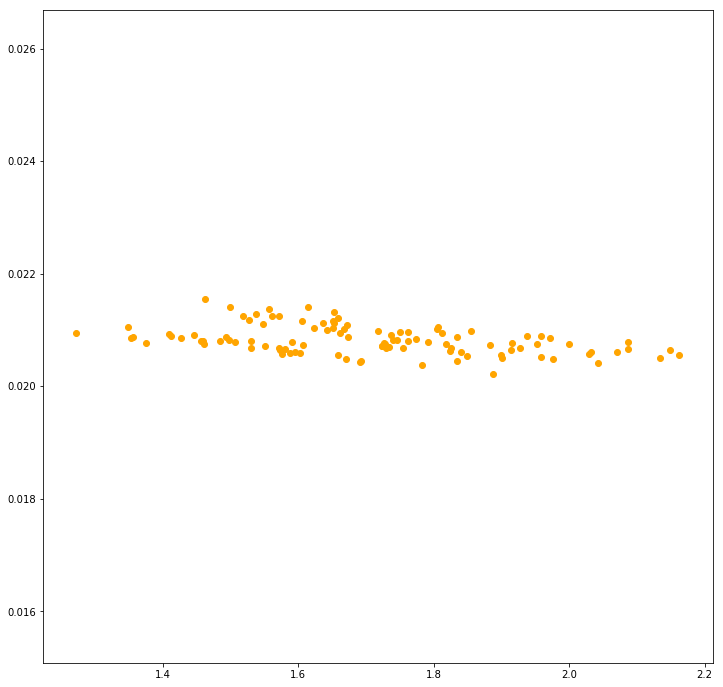

In [219]:
plt.figure(figsize=(12,12))
plt.scatter(pf_x, pf_y, alpha=1.0, color='orange',label='postflashed superdark')
plt.savefig('pf_med_vs_num.pdf',dpi=144)

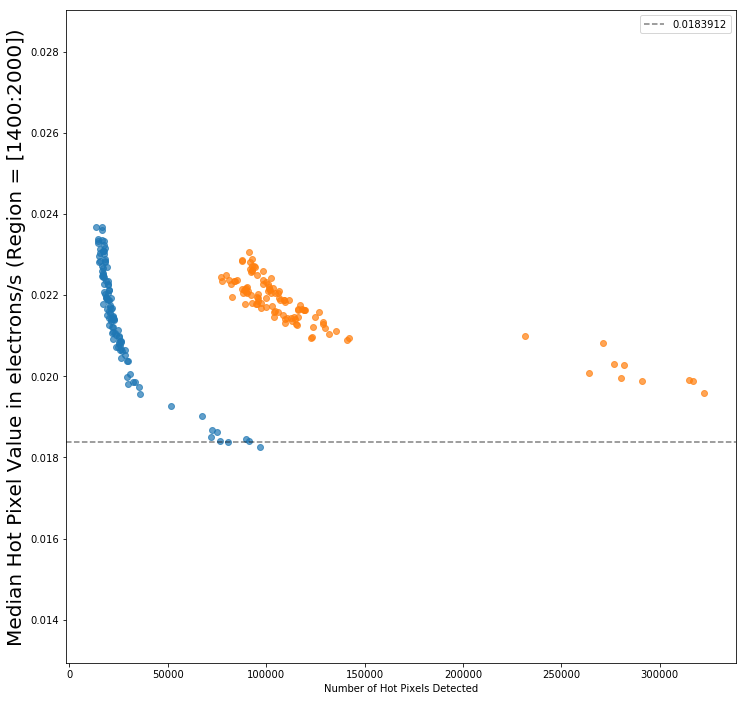

In [175]:
x = num_hp_list
y = med_hp_list

xtot = num_tot
ytot = med_tot

%matplotlib inline

plt.figure(figsize=(12,12))
plt.scatter(x,y,alpha=0.7) # top third
plt.scatter(xtot,ytot, alpha=0.7) # total chip 2
# line fit
x = np.asarray(x)
y = np.asarray(y)

z = np.polyfit(x, y, 1)
f = np.poly1d(z)

xp = np.linspace(np.min(x), np.max(x), 100)
#plt.plot(xp, f(xp), '-', color='black')

ma_y = y[x > 80000]
plt.axhline(np.median(ma_y),alpha=0.5,color='black', linestyle='--', label=str(np.median(ma_y)))
plt.legend()
plt.xlabel('Number of Hot Pixels Detected')
plt.ylabel('Median Hot Pixel Value in electrons/s (Region = [1400:2000])', fontsize=20)

plt.savefig('med_vs_num.pdf',dpi=144)

In [250]:
delta_hpnum_c = []
delta_hpnum_f = []

delta_hpmed_c = []
delta_hpmed_f = []

times = []

for uf,pf in zip(uf_sd_list, pf_sd_list):
    # x 
    anneal_cycle = uf.split('/')[-1].split('_')[0]
    t = Time(anneal_cycle,format='iso')
    decimal_year = t.decimalyear
    times.append(decimal_year)
    
    # y
    uf_sci1_c = fits.getdata(uf)[0:500,0:500]
    pf_sci1_c = fits.getdata(pf)[0:500,0:500]
    uf_sci1_f = fits.getdata(uf)[1500:2000,1500:2000]
    pf_sci1_f = fits.getdata(pf)[1500:2000,1500:2000]
    
    uf_dq3_c = fits.getdata(uf,3)[0:500,0:500]
    pf_dq3_c = fits.getdata(pf,3)[0:500,0:500]
    uf_dq3_f = fits.getdata(uf,3)[1500:2000,1500:2000]
    pf_dq3_f = fits.getdata(pf,3)[1500:2000,1500:2000]
    
    uf_hp_c = uf_sci1_c[uf_sci1_c > 0.015]
    pf_hp_c = pf_sci1_c[pf_sci1_c > 0.015]
    uf_hp_f = uf_sci1_f[uf_sci1_f > 0.015]
    pf_hp_f = pf_sci1_f[pf_sci1_f > 0.015]
    
    pf_minus_uf_c = len(pf_hp_c) - len(uf_hp_c)
    pf_minus_uf_f = len(pf_hp_f) - len(uf_hp_f)
    
    d_med_c = np.median(pf_hp_c) - np.median(uf_hp_c)
    d_med_f = np.median(pf_hp_f) - np.median(uf_hp_f)
    
    delta_hpnum_c.append(pf_minus_uf_c)
    delta_hpnum_f.append(pf_minus_uf_f)
    delta_hpmed_c.append(d_med_c)
    delta_hpmed_f.append(d_med_f)

In [226]:
y_hpnum_c = []
y_hpnum_f = []

a_reg = 500*500
for i,j in zip(delta_hpnum_c, delta_hpnum_f):
    y_hpnum_c.append((i/a_reg)*100)
    y_hpnum_f.append((j/a_reg)*100)

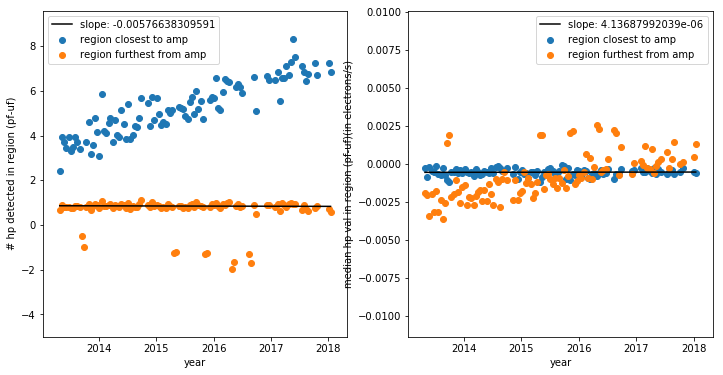

In [251]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

axs[0].scatter(times, y_hpnum_c, label='region closest to amp')
axs[0].scatter(times, y_hpnum_f, label='region furthest from amp')
axs[0].set_ylabel(r'# hp detected in region (pf-uf)')
axs[0].set_xlabel('year')
axs[0].set_ylim(-5)

y_hpnum_f = np.asarray(y_hpnum_f)
times = np.asarray(times)
z = np.polyfit(times[(y_hpnum_f > 0.) & (y_hpnum_f <2)], y_hpnum_f[(y_hpnum_f > 0.) & (y_hpnum_f <2)],1)
p = np.poly1d(z)

x = np.linspace(np.min(times), np.max(times), 100)
axs[0].plot(x,p(x), color='black', label=('slope: ')+str(p[1]))

axs[0].legend()

axs[1].scatter(times, delta_hpmed_c, label='region closest to amp')
axs[1].scatter(times, delta_hpmed_f, label='region furthest from amp')
axs[1].set_ylabel(r'median hp val in region (pf-uf)(in electrons/s)')
axs[1].set_xlabel('year')

delta_hpmed_c = np.asarray(delta_hpmed_c)
z = np.polyfit(times[(delta_hpmed_c > -1.) & (delta_hpmed_c <2)], delta_hpmed_c[(delta_hpmed_c > -1.) & (delta_hpmed_c <2)],1)
p = np.poly1d(z)
x = np.linspace(np.min(times), np.max(times), 100)
axs[1].plot(x,p(x), color='black', label=('slope: ')+str(p[1]))

axs[1].legend()
#plt.savefig('delta_plots.pdf',dpi=144)

In [43]:
uf_num = []
uf_med = []
pf_num = []
pf_med = []
row = []

# sci1
uf_sci1 = fits.getdata(uf_sd_list[100])
pf_sci1 = fits.getdata(pf_sd_list[100])

# hot pix
for n in range(len(uf_sci1[:,0])):
    uf_row = uf_sci1[n,:]
    uf_hp = uf_row[uf_row > 0.015]
    uf_med.append(np.median(uf_hp))
    uf_num.append(len(uf_hp))
    
    pf_row = pf_sci1[n,:]
    pf_hp = pf_row[pf_row > 0.015]
    pf_med.append(np.median(pf_hp))
    pf_num.append(len(pf_hp))
    
    row.append(n)

In [44]:

% matplotlib qt

plt.scatter(row, uf_num, alpha=0.5,label='unf')
plt.scatter(row, pf_num, alpha=0.5,label='post')

z = np.polyfit(row,uf_num,3)
p = np.poly1d(z)
x= np.linspace(0, 2050,100)
ppf=np.poly1d(np.polyfit(row,pf_num,3))
plt.plot(x,p(x), linestyle='-',color='black', label=str(p[0])+str(p[1])+str(p[2]))
plt.plot(x,ppf(x),linestyle='--',color='black',label=str(ppf[0])+str(ppf[1]))
#plt.ylim(0,200)
#plt.xlim(0,200)
plt.legend()

plt.figure(2)
plt.scatter(row, uf_med,alpha=0.5, label='unf')
plt.scatter(row, pf_med,alpha=0.5, label='post')

plt.ylabel('# hot pixels detected')
plt.xlabel('row')



plt.legend()


In [60]:
uf_num = []
uf_med = []
pf_num = []
pf_med = []
times = []

# sci1
uf_sci1 = fits.getdata(uf_sd_list[100])
pf_sci1 = fits.getdata(pf_sd_list[100])

# hot pix
for uf, pf in zip(uf_sd_list, pf_sd_list):
    uf_sci1 = fits.getdata(uf)[1400:2000,:]
    pf_sci1 = fits.getdata(pf)[1400:2000,:]
    
    uf_hp = uf_sci1[uf_sci1 > 0.015]
    pf_hp = pf_sci1[pf_sci1 > 0.015]
    
    uf_num.append(len(uf_hp))
    pf_num.append(len(pf_hp))
    
    anneal_cycle_pf = fits.getheader(pf)['DATE-OBS']
    t = Time(anneal_cycle_pf,format='iso')
    decimal_year = t.decimalyear
    times.append(decimal_year)

In [63]:
%matplotlib qt

plt.scatter(times, uf_num, alpha=0.5, label='unf')
plt.scatter(times, pf_num, alpha=0.5, label='post')
plt.ylabel('# hot pix in region')
plt.xlabel('year')

plt.legend()

In [51]:
uf_num = []
pf_num = []
times = []

for uf, pf in zip(uf_sd_list, pf_sd_list):
    uf_sci1 = fits.getdata(uf)
    uf_hp = uf_sci1[uf_sci1 > 0.015]
    pf_sci1 = fits.getdata(pf)
    pf_hp = pf_sci1[pf_sci1 > 0.015]
    
    uf_num.append(len(uf_hp))
    pf_num.append(len(pf_hp))
    
    anneal_cycle_uf = uf.split('/')[-1].split('_')[0]
    anneal_cycle_pf = fits.getheader(pf)['DATE-OBS']
    
    print(anneal_cycle_uf,anneal_cycle_pf)
    t = Time(anneal_cycle_pf,format='iso')
    decimal_year = t.decimalyear
    times.append(decimal_year)
    

2015-11-23 2015-11-21
2015-11-09 2015-11-08
2016-04-25 2016-04-23
2016-05-08 2016-05-06
2015-04-27 2015-04-25
2015-05-10 2015-05-08
2016-08-15 2016-08-14
2016-08-28 2016-08-26
2013-09-30 2013-09-28
2013-09-17 2013-09-15
2013-10-14 2013-10-12
2013-10-29 2013-10-27
2018-01-02 2017-12-31
2018-01-14 2018-01-14
2015-08-30 2015-08-27
2015-08-17 2015-08-16
2014-01-20 2014-01-18
2014-01-06 2014-01-04
2015-10-12 2015-10-10
2015-10-25 2015-10-23
2015-07-05 2015-07-03
2015-06-22 2015-06-21
2017-04-23 2017-04-21
2017-05-07 2017-05-05
2016-05-23 2016-05-22
2016-06-05 2016-06-04
2017-04-09 2017-04-07
2017-03-27 2017-03-25
2013-08-19 2013-08-18
2013-09-02 2013-08-31
2016-03-28 2016-03-26
2016-04-10 2016-04-09
2017-08-13 2017-08-11
2017-08-27 2017-08-26
2014-12-21 2014-12-19
2014-12-08 2014-12-07
2017-01-29 2017-01-27
2017-02-12 2017-02-10
2015-12-20 2015-12-18
2015-12-07 2015-12-05
2013-05-13 2013-05-12
2013-04-29 2013-04-27
2015-03-15 2015-03-13
2015-03-02 2015-02-28
2017-03-12 2017-03-10
2017-02-27

In [52]:
len(uf_perc), len(times)

(106, 106)

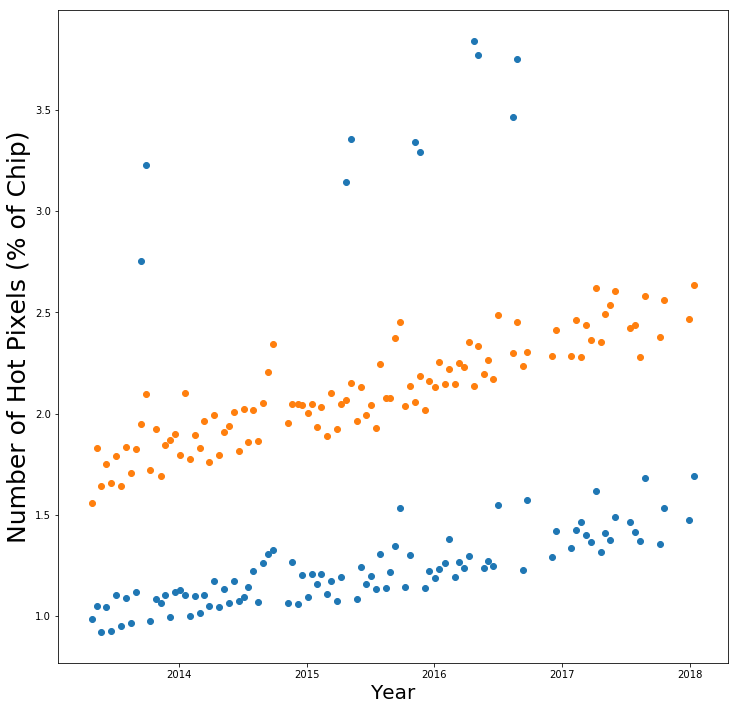

In [53]:
%matplotlib inline
uf_perc = []
pf_perc = []
area_chip = 2051*4096

for i,j in zip(uf_num, pf_num):
    uf_percent = (i/area_chip)*100
    pf_percent = (j/area_chip)*100
    
    uf_perc.append(uf_percent)
    pf_perc.append(pf_percent)
    
plt.figure(figsize=(12,12))
plt.scatter(times,uf_perc)
plt.scatter(times,pf_perc)
plt.ylabel('Number of Hot Pixels (% of Chip)',fontsize=25)
plt.xlabel('Year',fontsize=20)

#plt.savefig('quicklook_plot_cont.pdf',dpi=144)

In [54]:
to_2011 = '/grp/hst/wfc3h/bourque/uvis_darks/new_algorithm/post-anneal-20090821-to-20110107'
to_2012 = '/grp/hst/wfc3h/bourque/uvis_darks/new_algorithm/post-anneal-20110205-to-20121011'

In [55]:
anneal_cycles_upto2011 = glob(os.path.join(to_2011,'*'))
anneal_cycles_upto2012 = glob(os.path.join(to_2012,'*'))

superdarks = []

for i in anneal_cycles_upto2011:
    if 'ctecorr' not in i:
        superdarks.extend(glob(os.path.join(i,'deliver','*drk*')))
    
for j in anneal_cycles_upto2012:
    if 'ctecorr' not in i:
        superdarks.extend(glob(os.path.join(j,'deliver','*drk*')))

In [56]:
num_hp = []
dates  = []

for i in superdarks:
    sci1 = fits.getdata(i)
    hp   = sci1[sci1 > 0.015]
    num_hp.append(len(hp))
    
    date = fits.getheader(i)['DATE-OBS']
    dates.append(date)

In [63]:
len(perc_hp), len(uf_perc), len(num_hp), len(years)

(974, 106, 974, 974)

In [71]:
%matplotlib qt
perc_hp = []
years = []
area_chip = 2051*4096

for i,j in zip(num_hp,dates):
    percent = (i/area_chip)*100
    perc_hp.append(percent)
    
    t = Time(j,format='iso')
    decimal_year = t.decimalyear
    years.append(decimal_year)

y = perc_hp.extend(uf_perc)
x = years.extend(times)
plt.scatter(years, perc_hp, alpha=0.6, label='Unflashed Superdark')
plt.ylim(0,4)
plt.ylabel('Hot Pixels Detected'+'\n'+'(% of chip)')
plt.xlabel('Year')
pf_start = Time('2012-11-07',format='iso')
pf_start_dec_year = pf_start.decimalyear
plt.axvline(pf_start_dec_year, color='black', label='Post-flash start')

plt.title('Hot Pixels Detected: UVIS Chip 2')

plt.legend()

#plt.savefig('quicklook_plot.pdf', dpi=144)

In [58]:
problem = '/grp/hst/wfc3e/jmedina/uf_pl/2017-06-20_2017-07-14/uf_superdark/2017-07-02_superdark.fits'

In [59]:
dq3 = fits.getdata(problem,3)
sci1 = fits.getdata(problem,1)

In [60]:
sci1[dq3 == 16]

array([ 0.00642096,  0.00188722,  0.00129365, ...,  0.00666826,
        0.00112137,  0.00285448], dtype=float32)

In [63]:
len(sci1[sci1 > 0.015])

124895

In [1]:
# New plotting


In [2]:
import matplotlib.pyplot as plt

In [14]:
# getting Median Dark Current of unflashed population (post 2013)
from astropy.io import fits
import numpy as np
def dark_curr(file):
    with fits.open(file) as hdulist:
        # Calculate dark statistics
        expstart = hdulist[0].header['EXPSTART']
        dq_ext1 = hdulist[3].data
        dq_ext4 = hdulist[6].data
        
        good_data_ext1 = hdulist[1].data[np.where(dq_ext1 == 0)]
        good_data_ext4 = hdulist[4].data[np.where(dq_ext4 == 0)]
        
        cold_data_ext1 = good_data_ext1[np.where(good_data_ext1 <= 0.015)]
        cold_data_ext4 = good_data_ext4[np.where(good_data_ext4 <= 0.015)]
        dark_median_ext1 = np.median(cold_data_ext1) * 3600. # convert from e/s
        dark_median_ext4 = np.median(cold_data_ext4) * 3600. # to e/hr

        return expstart, dark_median_ext1, dark_median_ext4

In [37]:
cd /grp/hst/wfc3h/bourque/uvis_darks/new_algorithm

/grp/hst/wfc3t/bourque/uvis_darks/new_algorithm


In [38]:
directories = glob('post*')
paths_to_use = []
for i in directories:
    if ('to' not in i) & ('ctecorr' not in i):
        paths_to_use.append(i)

In [47]:
main_dir = '/grp/hst/wfc3t/bourque/uvis_darks/new_algorithm'

In [51]:
pf_superdarks = []
for path in paths_to_use:
    superdarks = glob(os.path.join(main_dir,path,'deliver', '*drk*'))
    pf_superdarks.extend(superdarks)

In [54]:
ql_chip1 = []
ql_chip2 = []
ql_times = []
for superdark in pf_superdarks:
    ql_time, ql_dat2, ql_dat1 = dark_curr(superdark)
    ql_times.append(ql_time)
    ql_chip1.append(ql_dat1)
    ql_chip2.append(ql_dat2)

In [15]:
chip1 = []
chip2 = []
times = []

for uf_sd in uf_sd_list:
    time, dat2, dat1 = dark_curr(uf_sd)
    times.append(time)
    chip1.append(dat1)
    chip2.append(dat2)

In [80]:
import matplotlib.pyplot as plt
%matplotlib qt
plt.scatter(times, chip2, s=20.0,color='coral', alpha=1, edgecolor='black', linewidth=0.3)
#plt.figure(2)
plt.scatter(ql_times, ql_chip2, s=20.0, color='grey', alpha=1, edgecolor='black', linewidth=0.3)